In [1]:
import numpy as np
import functions_eq_mag as fc
import functions_fatiando as ft
from timeit import default_timer as time
from matplotlib import pyplot as plt
%matplotlib inline

## Flops count Classical Vs. CGLS Vs. CGLS_BCCB

In [2]:
D = np.arange(10000.,1010000,10000)
P = np.arange(10000.,1010000,10000)
itmax = 50
k = 5

### Classical (Cholesky Factorization)

In [3]:
cholesky = 1/3 * (D**3) + 2 * (D**2) + 2 * (P**2 + P) * D
#classical = (N + N/3)*N**2

### CGLS

In [4]:
cgls = 2 * P * (D + 1) + itmax * (2 * P * (2 * D + 3) + 4 * D)

### Window (Leão, 1989)

In [5]:
D_ = 49
P_ = 225
#W = (N-np.sqrt(M_l))**2
ls89 = 7/6 * D_**3 + 4 * P_ * D_**2 + D * 2 * P_

### Window (Soler & Uieda, 2021)

In [6]:
D_ = 900
P_ = 900
M = D/D_ + 1 
su21 = M * (1/3 * P_**3 + 2 * (D_ + 1) * P_**2 + P_ * (4 * D_ + 1))

### Column-action update (Cordell, 1992)

In [7]:
c92 = D * np.log2(D) + itmax * (2 * D + D*np.log2(D))

### Reparametrization

In [8]:
Q = D/1000
reparam = 2 * Q * (D * P + D + 1) + 2 * P * Q + itmax * (2 * Q * (2 * D + 3) + 4 * D)

### Fast eq. layer (Siqueira, 2017)

In [10]:
sob17 = 2 * D**2 + 2 * D + itmax*(3*D + 2*D**2)

### Fast eq. layer toeplitz (Takahashi, 2020)

In [11]:
#taka = it*(27*N + k*8*N*np.log2(4*N))

### CGLS_BCCB

In [13]:
deconvcgls = k * 16 * D * np.log2(4*D) + 26 * D + itmax * (k * 16 * D * np.log2(4*D) + 58 * D)

### Deconvolution

In [14]:
deconv = k * 12 * D * np.log2(4*D) + 72 * D
#decon_wiener = k * 12 * N * np.log2(4*N) + 76 * N

### PEL

In [15]:
# Para um polinômio de primeira ordem, alpha = 1
#P, Q = 3, N/1000
#H, M_s = P*Q, N/Q

#pel = 1/3 * (H**3) + 2 * (H**2) + 2*N*M_s*H + H*H*N + 2*N*H + 2*N*P

### Wavelet

In [16]:
# Consider a 98% compression rate af matrix A using the wavelet and a log2(N) complexity for the transforming operation
#C_r = N*0.02
#wave = 2 * (N*a) + 4 * N * np.log2(N) + it * (4 * N * np.log2(N) + 4 * N*a + 12 * a)
#wave = 2 * (N*a) + 4 * np.log2(N) + it * (4 * np.log2(N) + 4 * N*a + 12 * a)
#wave = 2*N*N + 4*N + 2 * (N*C_r) + 4 * N * np.log2(N) + it * (4 * N * np.log2(N) + 4 * N*C_r + 12 * C_r)

### Plot Flops Count

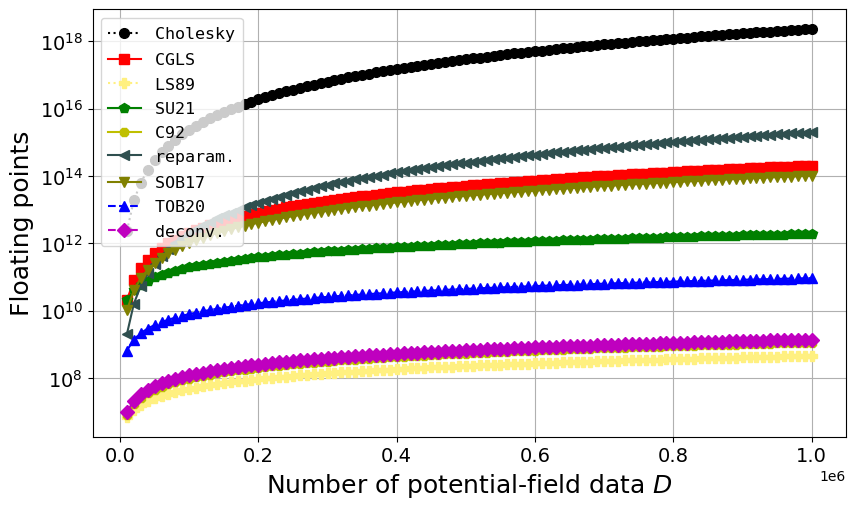

In [20]:
height=6.
width = 10.
height_per_width = height/width
fig = plt.figure(figsize=(4.33*2,4.33*height_per_width*2))
fig.patch.set_facecolor('xkcd:white')

plt.semilogy(D, cholesky, 'ko:', alpha=1, markersize=7, label='$\mathtt{Cholesky}$')
plt.semilogy(D, cgls, 'rs-', alpha=1, markersize=7, label='$\mathtt{CGLS}$')

plt.semilogy(D, ls89, 'P:', color = '#fff08080', alpha=1, markersize=7, label='$\mathtt{LS89}$')
plt.semilogy(D, su21, 'gp-', alpha=1, markersize=7, label='$\mathtt{SU21}$')

plt.semilogy(D, c92, 'y8-', alpha=1, markersize=7, label='$\mathtt{C92}$')

plt.semilogy(D, reparam, '<-', color = 'darkslategrey', alpha=1, markersize=7, label='$\mathtt{reparam.}$')

plt.semilogy(D, sob17, 'v-', color = 'olive', alpha=1, markersize=7, label='$\mathtt{SOB17}$')


plt.semilogy(D, deconvcgls, 'b^--', alpha=1, markersize=7, label='$\mathtt{TOB20}$')
plt.semilogy(D, deconv, 'mD--', alpha=1, markersize=7, label='$\mathtt{deconv.}$')
#plt.semilogy(D, decon_wiener, 'cx--', alpha=1, markersize=7, label='Deconvolution w/ Wiener')

#plt.axis('scaled')
#plt.xlim(np.min(N)-1,np.max(N)+1)
#plt.ylim(10**7,10**15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of potential-field data $D$', fontsize=18)
plt.ylabel('Floating points', fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left', fontsize=12);
plt.savefig('../../manuscript/Fig/flops_grav.png', dpi= 300)